# Linear Model Algorithm

## Import Library

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.append("../")

from src.linear_model import LinearRegression

## A. Linear Regression

In [2]:
# Data Input
X = np.array([[1, 1, 4, 10], [1, 2, 10, 11], [2, 2, 13, 15], [2, 3, 7, 9]])
y = np.dot(X, np.array([1, 2, 4, 4])) + 3

# Find model parameter using ols equation
print("======= OLS Equation =======")
reg = LinearRegression(fit_intercept=True, optimizer="ols")
reg.fit(X, y)

print(f"y : {y}")
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[1,1,4,10]])))

# Find model parameter using gradient descent
print("======= Gradient Descent =======")
reg = LinearRegression(fit_intercept=True, optimizer="gradient-descent", learning_rate=1e-3, num_iters=100000)
reg.fit(X, y)

print(f"y : {y}")
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[1,1,4,10]])))

======= OLS Equation =======
y : [ 62  92 121  75]
[0.42251314 2.64165207 3.85028118 4.25666083]
0.9681017792938107
[62.]
======= Gradient Descent =======
Cost at iteration 0 is : 2481.147183140625
Cost at iteration 10000 is : 0.00906879256047869
Cost at iteration 20000 is : 0.0018207638924570735
Cost at iteration 30000 is : 0.0003655614277957406
Cost at iteration 40000 is : 7.339510523344765e-05
Cost at iteration 50000 is : 1.4735803787392548e-05
Cost at iteration 60000 is : 2.9585612360527404e-06
Cost at iteration 70000 is : 5.940011630051065e-07
Cost at iteration 80000 is : 1.192597865995715e-07
Cost at iteration 90000 is : 2.3944223656551034e-08
y : [ 62  92 121  75]
[0.42280784 2.64152134 3.85028112 4.2566551 ]
0.9679760178491651
[61.99998071]


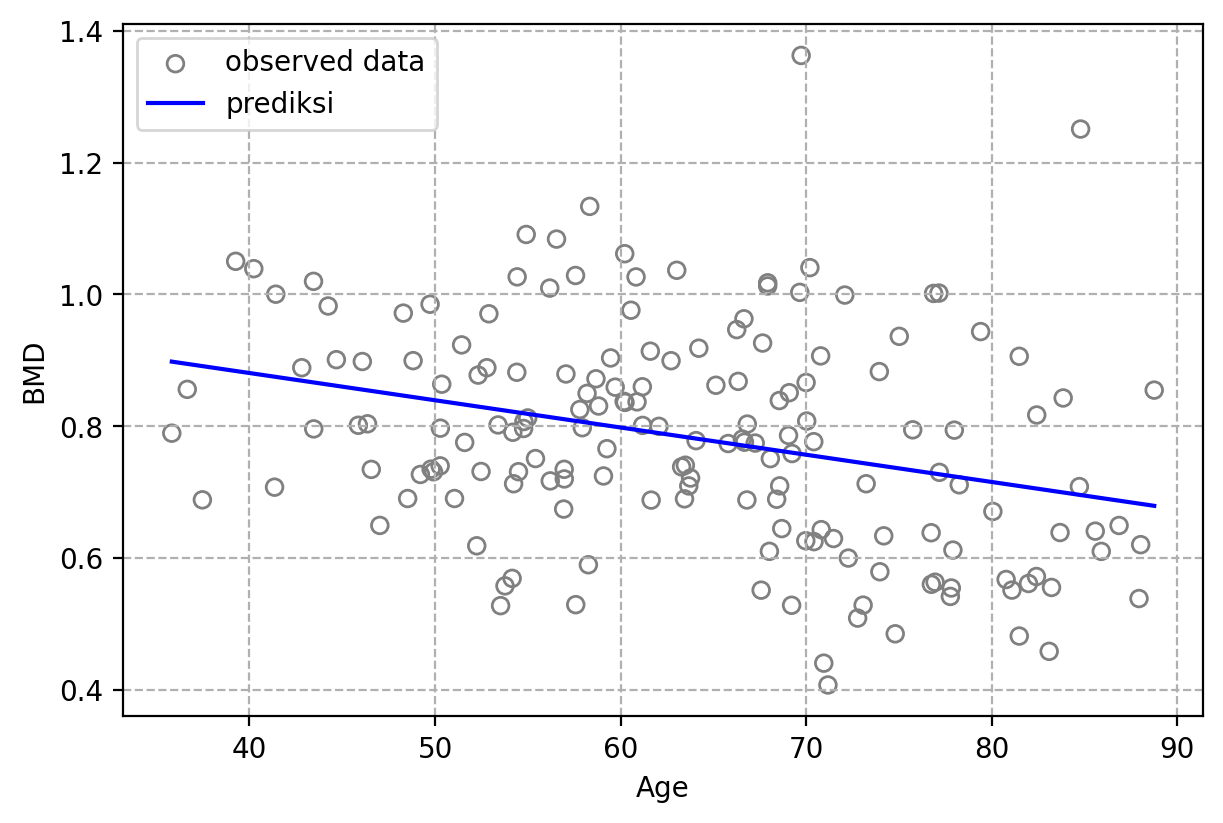

In [12]:
# Calculate using OLS Equation
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df[['age']]
y_train = df['bmd']
X_test = X_train.copy() + 1e-6

# Create prediction
reg = LinearRegression(optimizer="ols")
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted['age'], y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()

Cost at iteration 0 is : 0.16576483276875192
Cost at iteration 20000 is : 0.023574066842012895
Cost at iteration 40000 is : 0.018707554812281493
Cost at iteration 60000 is : 0.01597739027970017
Cost at iteration 80000 is : 0.014445739206112411
Cost at iteration 100000 is : 0.013586466813102464
Cost at iteration 120000 is : 0.013104405945505765
Cost at iteration 140000 is : 0.012833964718767321
Cost at iteration 160000 is : 0.012682244340624116
Cost at iteration 180000 is : 0.012597127609637776


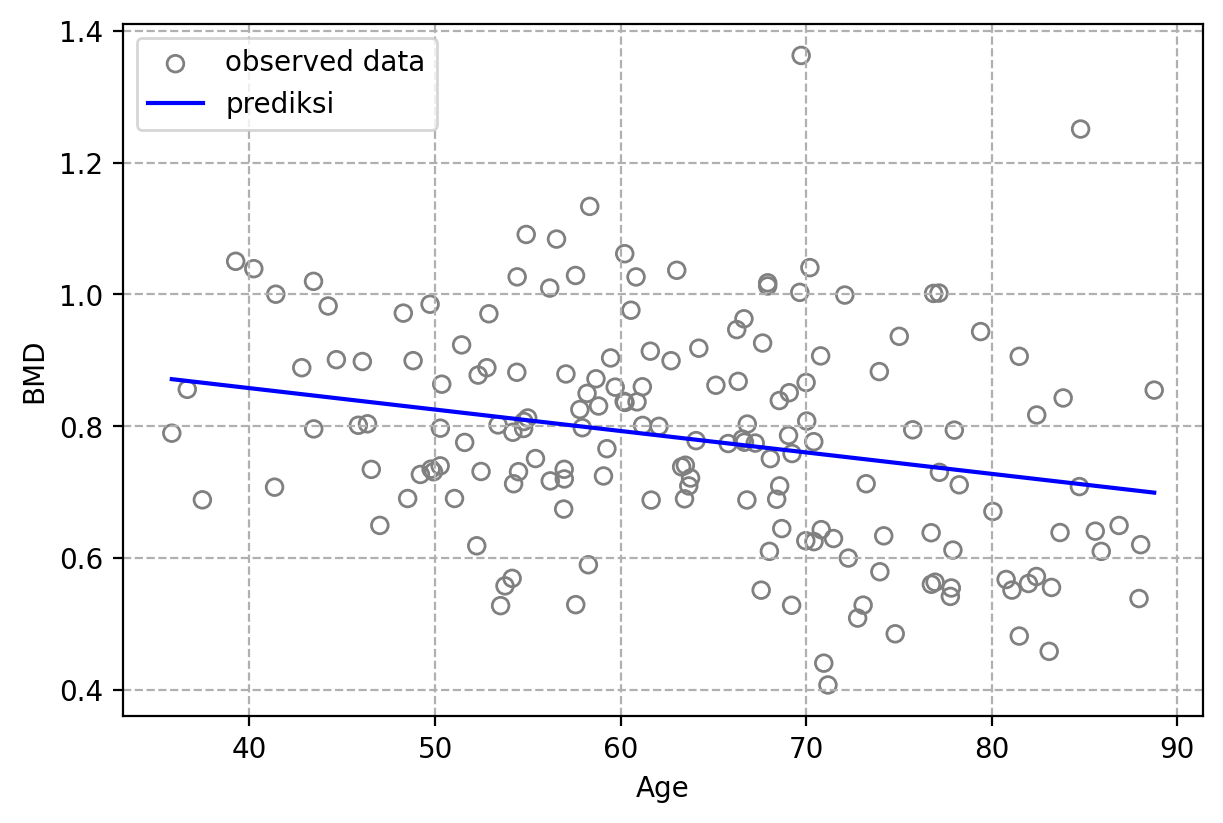

In [4]:
# Calculate using gradient descent equation
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df[['age']]
y_train = df['bmd']
X_test = X_train.copy() + 1e-6

# Create prediction
reg = LinearRegression(optimizer="gradient-descent", learning_rate=4e-4, num_iters=200000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted['age'], y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()

NOTE : OLS Execution time is more faster than gradient descent for Linear Regression case

## B. Rigde Regression

In [2]:
from src.linear_model import Ridge

In [3]:
X = np.array([[1, 1, 4, 10], [1, 2, 10, 11], [2, 2, 13, 15], [2, 3, 7, 9]])
y = np.dot(X, np.array([1, 2, 4, 4])) + 3

print("========== OLS EQUATION ==========")
clf = Ridge(alpha=1.0, optimizer="ols")
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.predict([[1.0, 2.0, 10.0, 11.0]]))

print("========== GRADIENT DESCENT ==========")
clf = Ridge(alpha=1.0, optimizer="gradient-descent")
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.predict([[1.0, 2.0, 10.0, 11.0]]))

========== OLS EQUATION ==========
[1.11006848 0.69464874 4.37255897 3.31169161]
10.022318031956416
[92.67588131]
========== GRADIENT DESCENT ==========
Cost at iteration 0 is : 4053.9029877371613
Cost at iteration 1000 is : 55.70713691273978
Cost at iteration 2000 is : 6.553447961506428
Cost at iteration 3000 is : 5.920540341497118
Cost at iteration 4000 is : 5.884816051019576
Cost at iteration 5000 is : 5.8574169501027535
Cost at iteration 6000 is : 5.8310631878416
Cost at iteration 7000 is : 5.805622830871802
Cost at iteration 8000 is : 5.781054018382412
Cost at iteration 9000 is : 5.757318117503548
[0.66552717 0.92579672 3.77469318 4.61651648]
0.4178305507806544
[91.46356425]


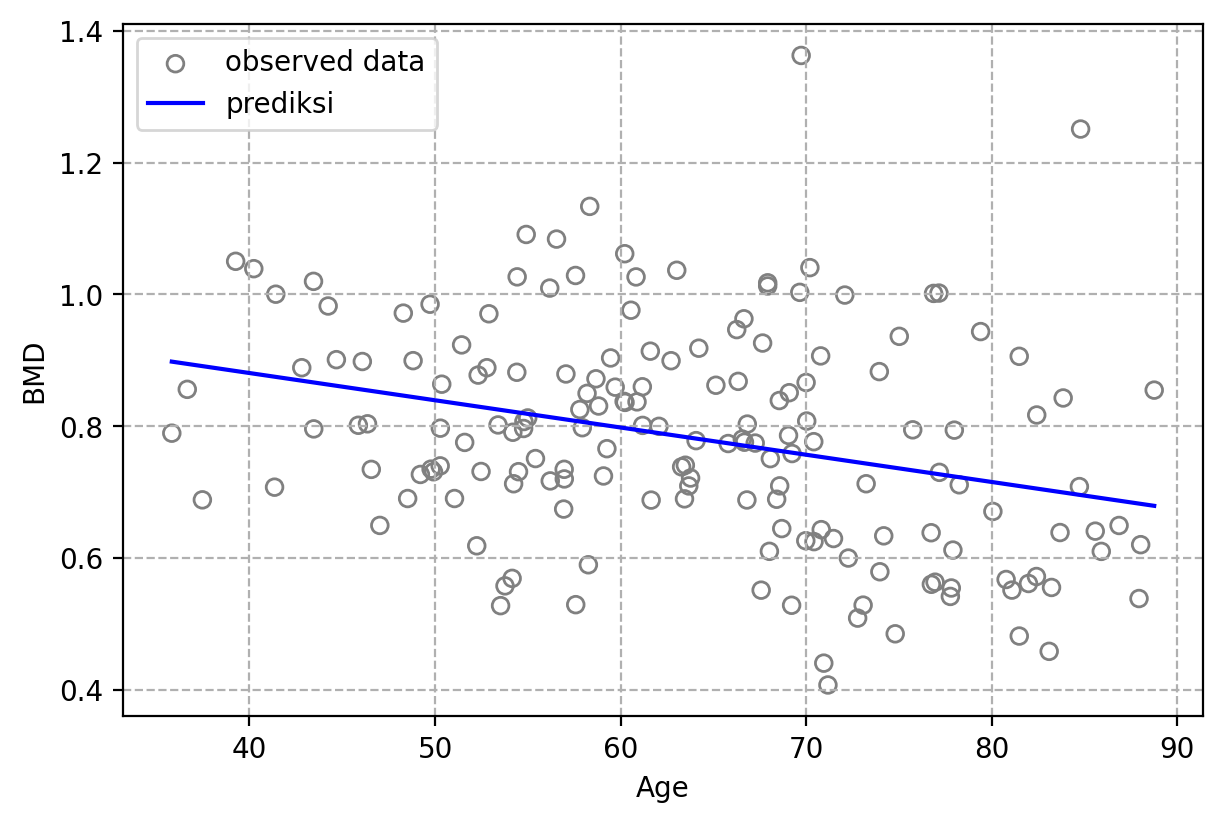

In [4]:
# Calculate using OLS Equation
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df[['age']]
y_train = df['bmd']
X_test = X_train.copy() + 1e-6

# Create prediction
reg = Ridge(alpha=1.0, optimizer="ols")
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted['age'], y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()

Cost at iteration 0 is : 0.16576597877261087
Cost at iteration 20000 is : 0.02357407583902972
Cost at iteration 40000 is : 0.018707446957681905
Cost at iteration 60000 is : 0.015977276166724955
Cost at iteration 80000 is : 0.014445654847424905
Cost at iteration 100000 is : 0.013586417808663534
Cost at iteration 120000 is : 0.013104387244400571
Cost at iteration 140000 is : 0.012833968891371198
Cost at iteration 160000 is : 0.012682264640486336
Cost at iteration 180000 is : 0.012597158805476554


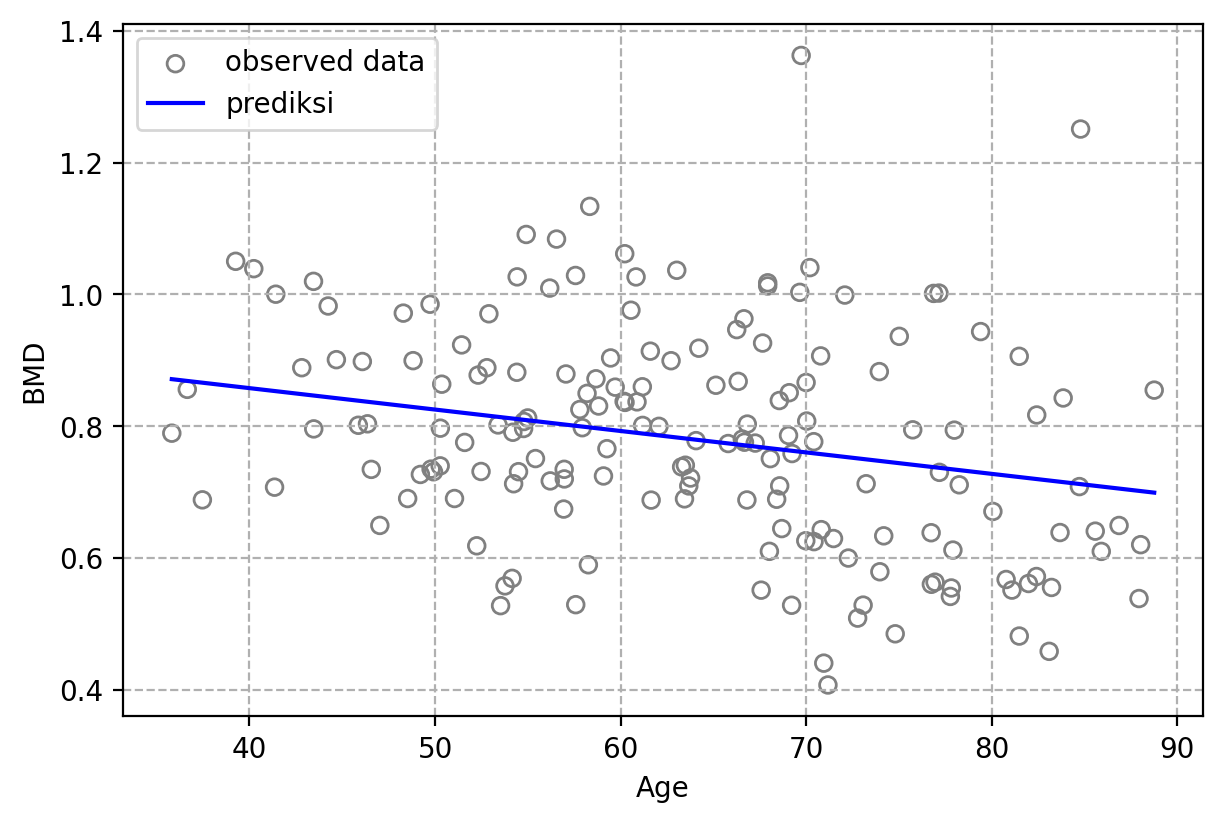

In [14]:
# Calculate using OLS Equation
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df[['age']]
y_train = df['bmd']
X_test = X_train.copy() + 1e-6

# Create prediction
reg = Ridge(alpha=1.0, optimizer="gradient-descent", learning_rate=4e-4, num_iters=200000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted['age'], y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()

## C. Lasso Regression

In [6]:
from src.linear_model import Lasso

In [7]:
# REGRESSION CASE - 1
# -------------------
X = np.array([[0,0], [1,1], [2,2]])
y = np.array([0, 1, 2])

clf = Lasso(lamda=0.1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)

[0.85 0.  ]
0.1499999999999998


In [8]:
# REGRESSION CASE - 1
# -------------------
X = np.array([[0,0], [1,1], [2,2]])
y = np.array([0, 1, 2])

clf = Lasso(lamda=0.1)
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)

[0.85 0.  ]
0.1499999999999998


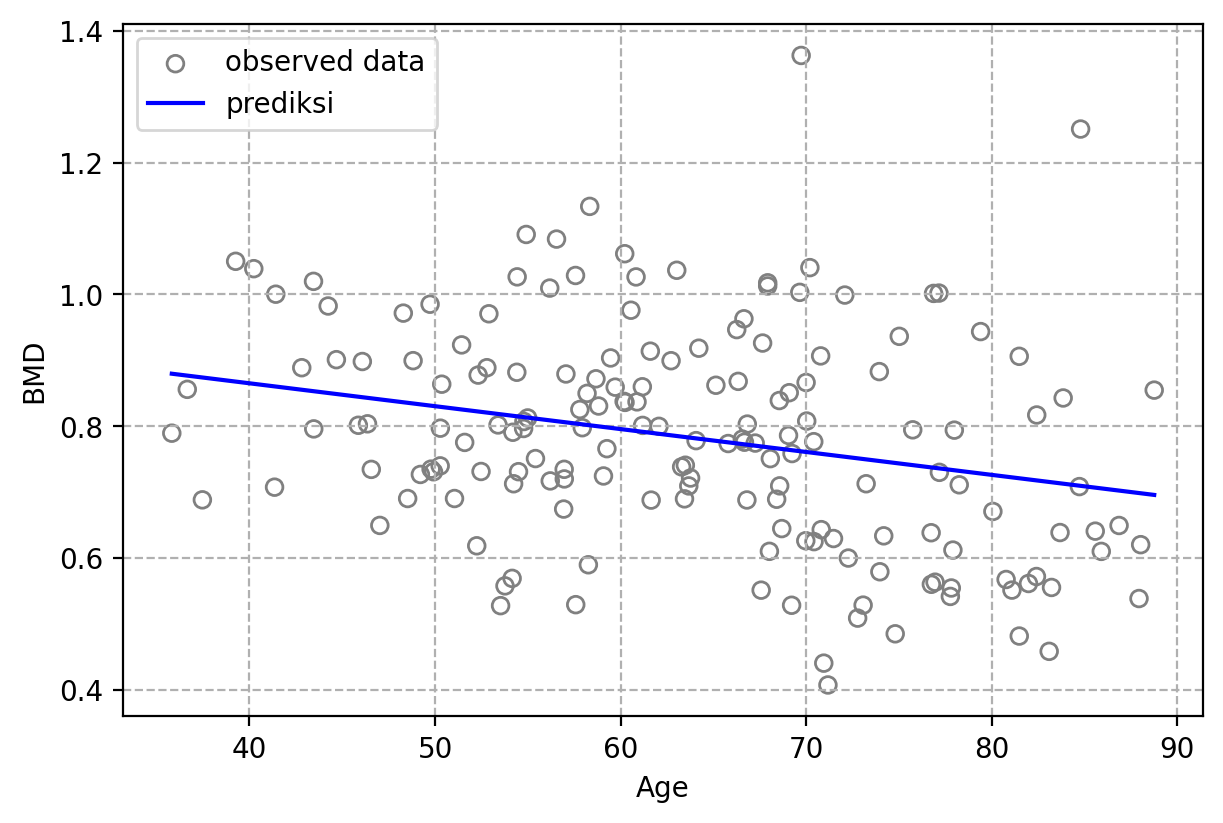

In [11]:
# Calculate using OLS Equation
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df[['age']]
y_train = df['bmd']
X_test = X_train.copy() + 1e-6

# Create prediction
reg = Lasso(lamda=0.1, optimizer="ols")
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted['age'], y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()

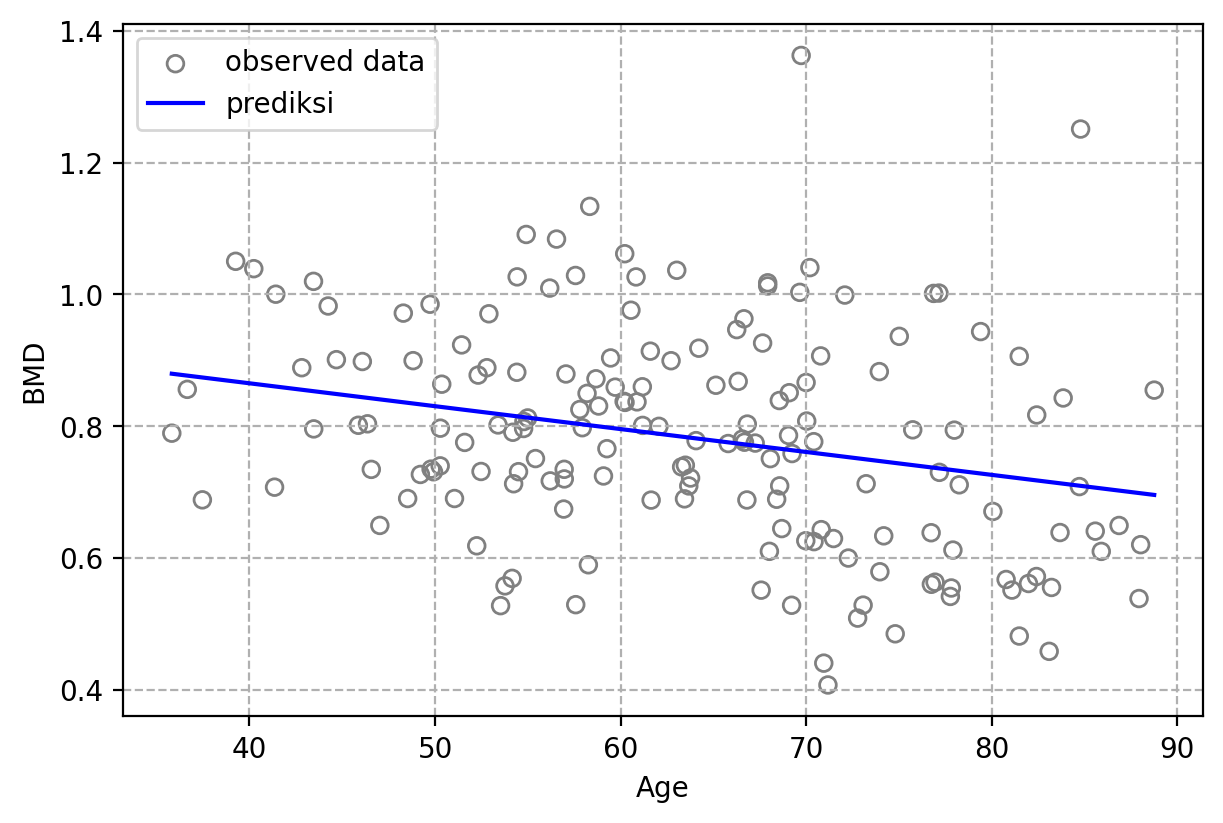

In [12]:
# Calculate using OLS Equation
# Prepare data
df = pd.read_csv('../../data/raw/bmd.csv')
X_train = df[['age']]
y_train = df['bmd']
X_test = X_train.copy() + 1e-6

# Create prediction
reg = Lasso(lamda=0.1, optimizer="gradient-descent")
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# Plot
fig, ax = plt.subplots(nrows=1, ncols=1, constrained_layout=True, dpi=200)

ax.scatter(X_train, y_train, c="none", edgecolors='grey', label="observed data")
idx_sort = np.argsort(X_test['age']).to_list()
X_test_sorted = X_test.loc[idx_sort]
y_pred_sorted = y_pred[idx_sort]
ax.plot(X_test_sorted['age'], y_pred_sorted, c='b', label="prediksi")

ax.legend()
ax.grid(linestyle="--")
ax.set_xlabel("Age")
ax.set_ylabel("BMD")
plt.show()

## D, Logistic Regression

In [2]:
from src.linear_model import LogisticRegression

[0 1 1 1]
[0.02053742 0.99179754 0.99999857 0.99179754]


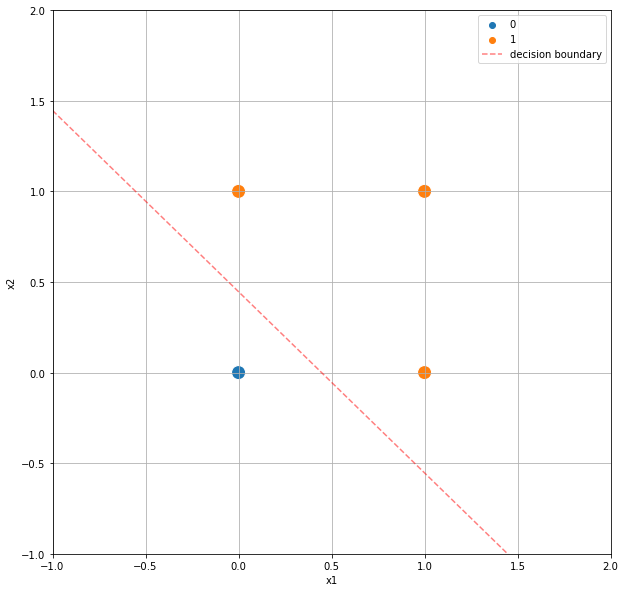

In [4]:
# GENERATE DATA
# This is an OR logic operation
# X1 | X2 | X1 or X2
# 0  | 0  | 0
# 1  | 0  | 1
# 1  | 1  | 1
# 0  | 1  | 1
data = pd.DataFrame({"x1": [0, 1, 1, 0],
                     "x2": [0, 0, 1, 1],
                     "y": [0, 1, 1, 1]})
X = data[["x1", "x2"]]
y = data["y"]


# Modeling
clf = LogisticRegression()
clf.fit(X, y)
print(clf.predict(X))
print(clf.predict_proba(X))


# Create Decision Boundary
w1, w2 = clf.coef_
w0 = clf.intercept_
m = -w1/w2
c = -w0/w2

# Create prediction
y_pred = clf.predict(X)
data["y_pred"] = y_pred

# PLOT
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.scatterplot(data = data,
                x = "x1",
                y = "x2",
                hue = "y_pred",
                s = 200,
                ax = ax)

# Plot decision
x_ = np.linspace(-1, 2, 101)
y_ = m*x_ + c
ax.plot(x_, y_, "--r", alpha=0.5, label="decision boundary")

plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.legend()
plt.grid()
plt.show()